# Faktorska analiza akademskih rezultata učenika srednjih škola

Akademske performanse općenito se definiraju kao razina do koje je određeni učenik/učenica postigao svoje kratkoročne ili dugoročne akademske ciljeve. Iste se najčešće mjere usmenim i/ili pismenim ispitima kao i kontinuiranim provjerama znanja koje naposljetku rezultiraju metrikama poput težinskih prosjeka ocjena ili rezultata standardiziranih testova sposobnosti. Pitanje intrizičnog značaja za ovo područje istraživanja pronalazak je, odnosno definiranje faktora koji uspješno mogu predvidjeti učenikove akademske performase, poput razine edukacije roditelja, motivacije učenika, socioekonomske pozadine itd. Iako rezultati studija nisu konkluzivni, određeni faktori poput inteligencije učenika mjerene standardiziranim IQ testovima ili samodiscipline povezane su s razlikama u akademskim performansama. Također, prema određenim, iako i dalje nekonkluzivnim studijama, utjecaj roditelja može objasniti i do 80% akademskog uspjeha djeteta. Glavni je cilj ove podatkovne analize **istražiti vezu raznih faktora (osobni, ekonomski, socijalni) i akademskog uspjeha učenika**. Rezultati istraživanja imaju važne praktične posljedice i mogu potencijalno imati značaj u smislu poduzimanja akcija s ciljem maksimizacije akademskog uspjeha učenika i smanjenja razine psihološkog stresa tijekom školovanja.
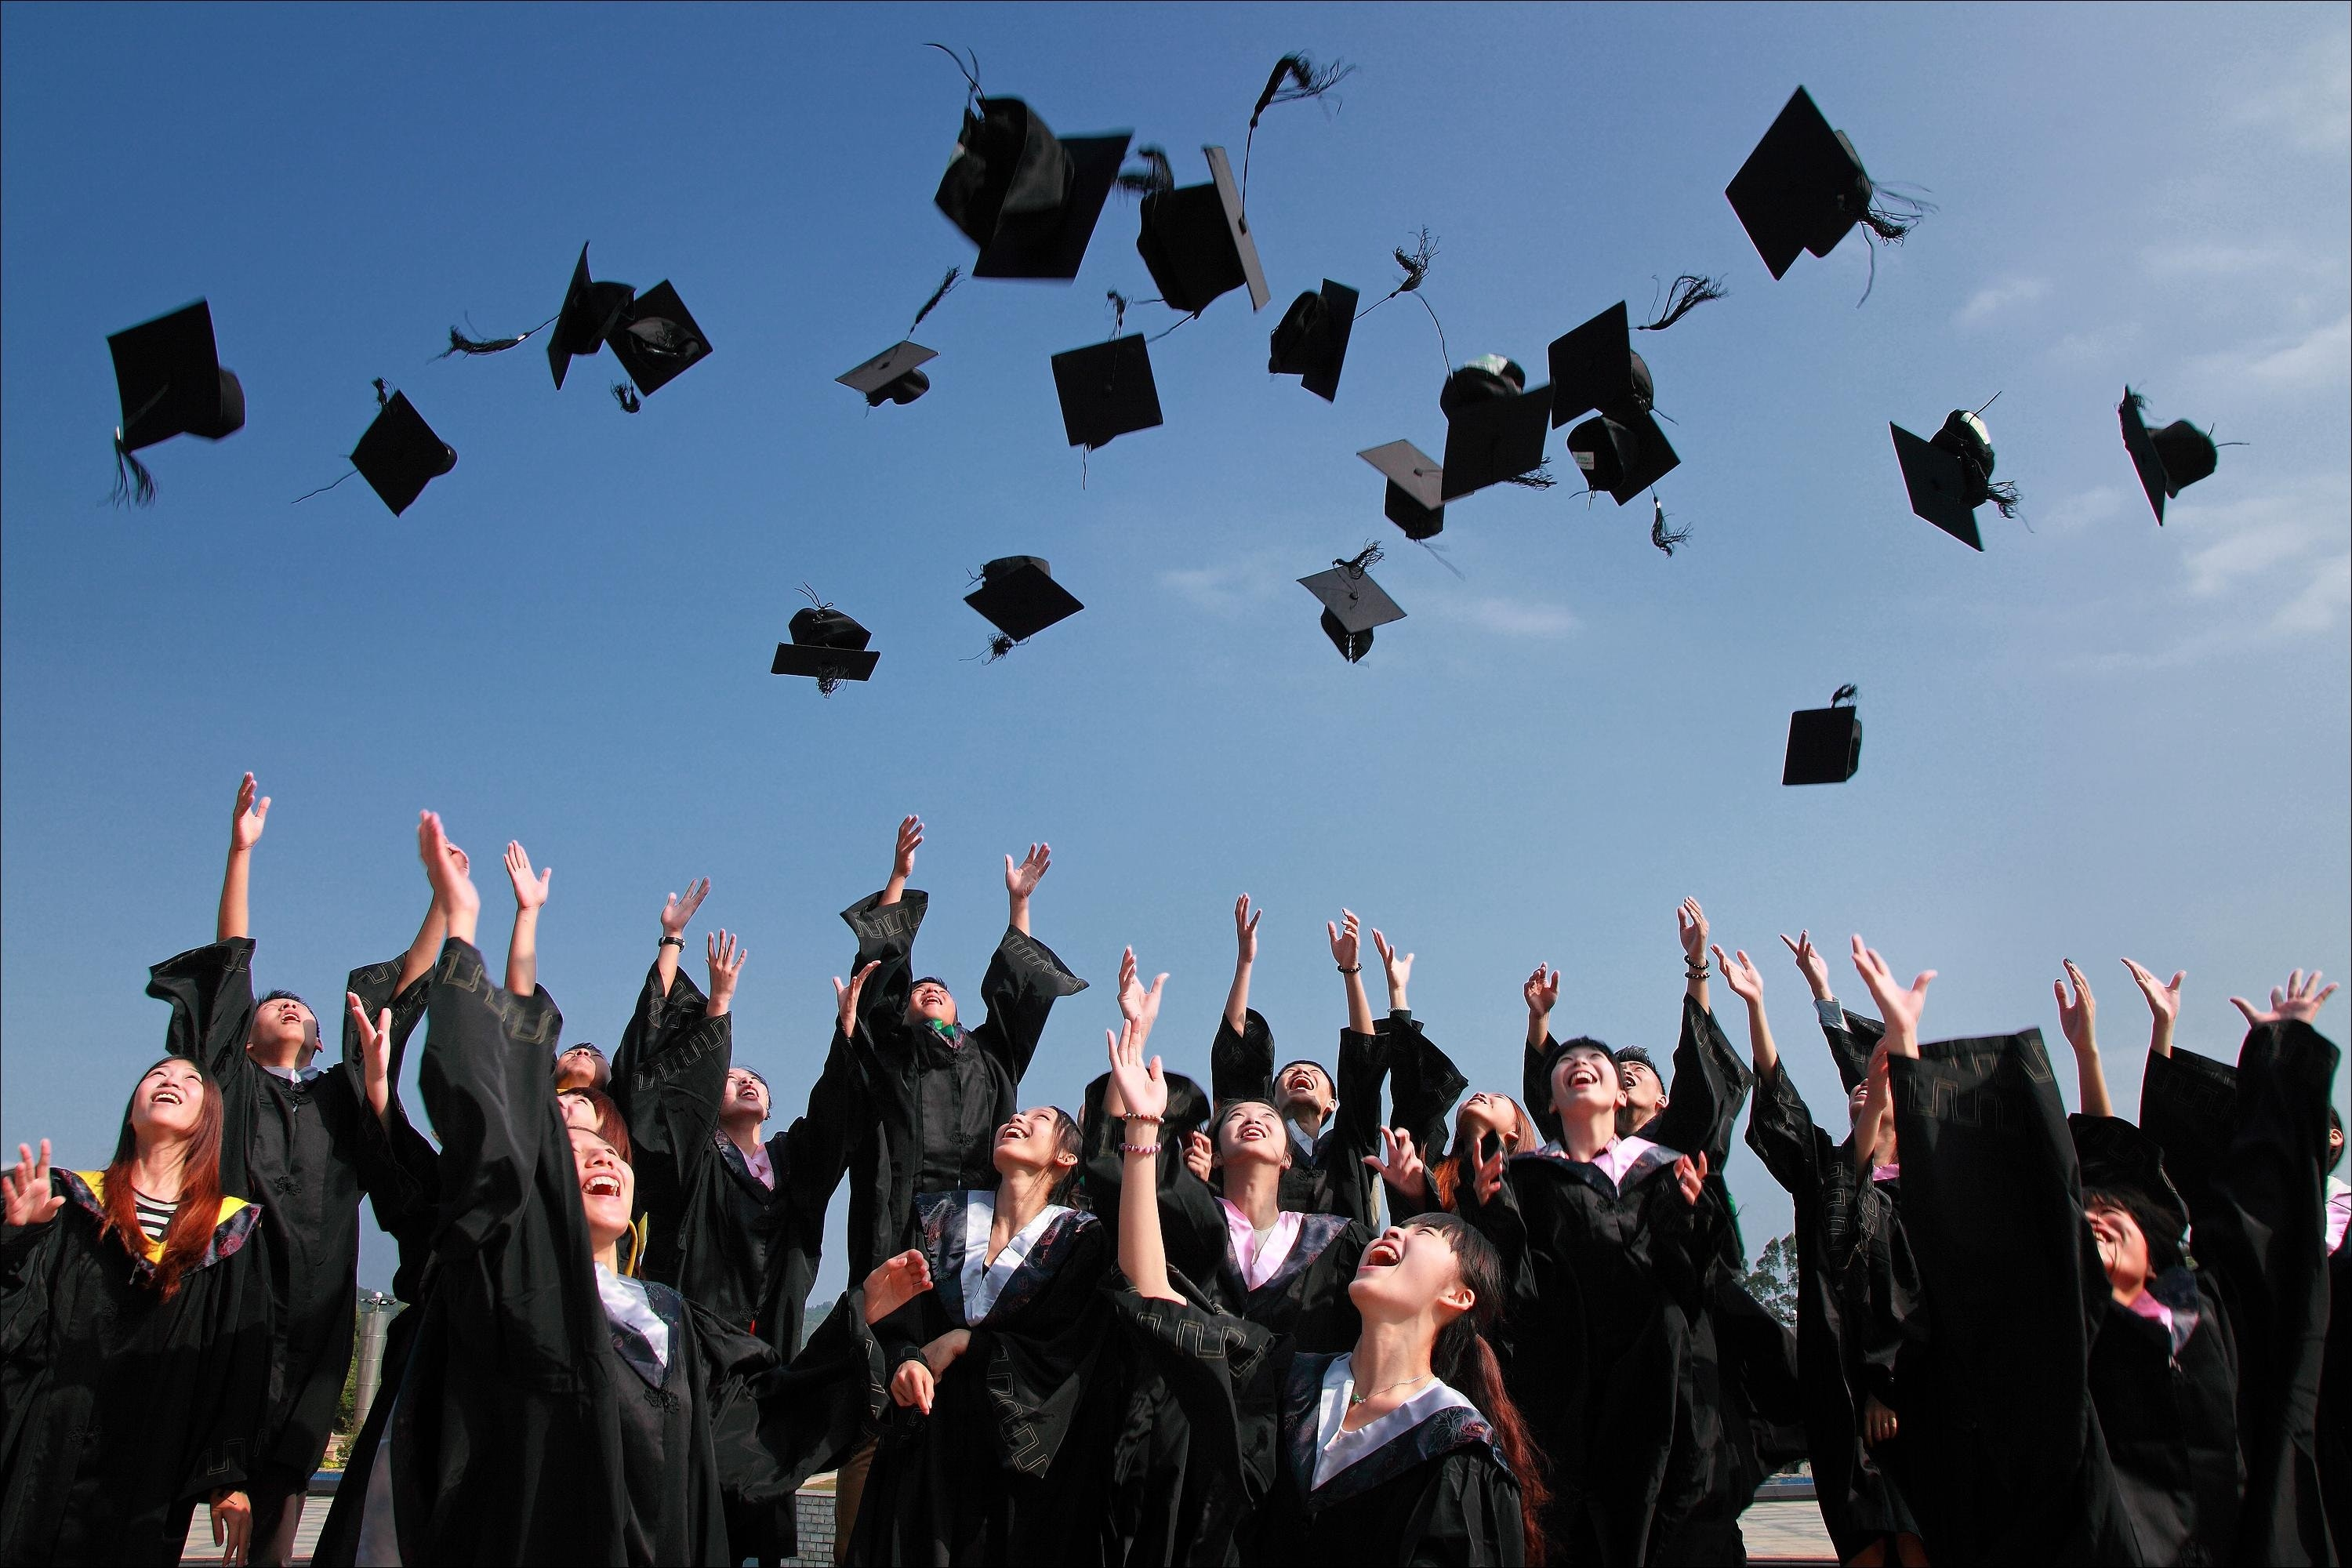
*Slika 1: Maturantska proslava. Postizanje obrazovnih "benchmark"-ova poput završetka srednje škole (prikazano na slici) ili završetka fakulteta smatraju se osnovnim primjerom akademskog uspjeha*
***

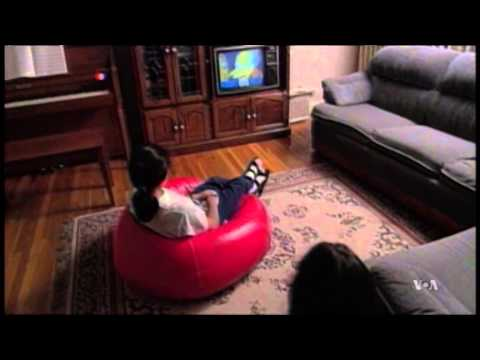

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('g8sL-x4DbqY')

*Video 1: Studija o utjecaju fizičkog dobrostanja na akademske performanse, prilog VoA News. Jedna u nizu od studija unutar područja istraživanja kojemu je primarni cilj odrediti faktore u kauzalnoj vezi s akademskim performansama*

## Eksplorativna analiza podataka

Podatkovni skup korišten za potrebe ove analize nalazi se na __[web stranici](http://roycekimmons.com/)__ docenta Roycea Kimmonsa, PhD, čije područje istraživanja uključuje otvorenu edukaciju te korištenje napredne tehnologije u nastavi. Analizu započinjemo importiranjem svih potrebnih paketa, odnosno funkcija.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
from urllib.request import urlretrieve
from scipy.stats import norm
from statsmodels.graphics.gofplots import qqplot
%matplotlib notebook

Zatim pristupamo podatkovnom skupu korištenjem funkcije get_data().

In [3]:
URL = "http://roycekimmons.com/system/generate_data.php?dataset=exams&n=1000"

def get_data(filename="stdata.csv", url=URL, force_download=False):
    if force_download or not os.path.exists(filename):
        urlretrieve(url, filename)
    data = pd.read_csv("stdata.csv")
    return data

In [4]:
data = get_data()

Koristimo metodu pd.head() (s defaultnim parametrom $5$) s ciljem stjecanja krupne slike o podatkovnom skupu.

In [5]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group B,some college,free/reduced,none,54,51,49
1,male,group D,high school,standard,none,88,75,76
2,male,group C,some high school,free/reduced,none,53,50,42
3,female,group B,bachelor's degree,standard,none,43,48,41
4,male,group B,master's degree,free/reduced,completed,89,89,86


Vidljivo je kako naš podatkovni skup sadrži sljedeće značajke: spol, rasa/narodnost, razina obrazovanja roditelja, ručak, pripremni tečaj za test te rezultati ispita iz matematike, čitanja i pisanja. U tablici se ne nalaze eksplicitni nazivi za određene rase/narodnosti već samo slova od A do E kao oznake. Varijabla "lunch" posebno je zanimljiva te govori o tome jede li učenik standardni školski ručak ili reducirani/besplatni, što govori o ekonomskom statusu učenika. U sljedećem koraku određujemo duljinu i oblik skupa.

In [6]:
print(len(data))
print(data.shape)

1000
(1000, 8)


Prosjeke, standardne devijacije, percentile i ostala obilježja određenih značajki našeg podatkovnog skupa određujemo korištenjem metode pd.df.describe() te provjeravamo tip podatka za svaki stupac pomoću atributa pd.df.dtypes.

In [7]:
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.518000,69.691000,68.552000
std,15.316536,14.998215,15.560187
min,16.000000,15.000000,10.000000
25%,56.000000,60.000000,58.000000
50%,66.000000,70.000000,68.000000
75%,78.000000,81.000000,81.000000
max,100.000000,100.000000,100.000000


In [8]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

Primijetimo da je podatkovni tip za prvih pet stupaca "object", odnosno "int64" za rezultate iz matematike, čitanja i pisanja. Nadalje, korisno je provjeriti postoje li "NULL" vrijednosti u našem podatkovnom skupu.

In [9]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Zaključujemo da nema "NULL" vrijednosti. Nadalje, određujemo koje vrijednosti poprima prvih pet stupaca (kategoričke varijable):

In [10]:
for y in [x for x in data.columns][:5]:
    print(data[y].unique())

['male' 'female']
['group B' 'group D' 'group C' 'group A' 'group E']
['some college' 'high school' 'some high school' "bachelor's degree"
 "master's degree" "associate's degree"]
['free/reduced' 'standard']
['none' 'completed']


Vizualizirajmo najprije rezultate iz matematike, čitanja i pisanja uporabom paketa *seaborn()*.

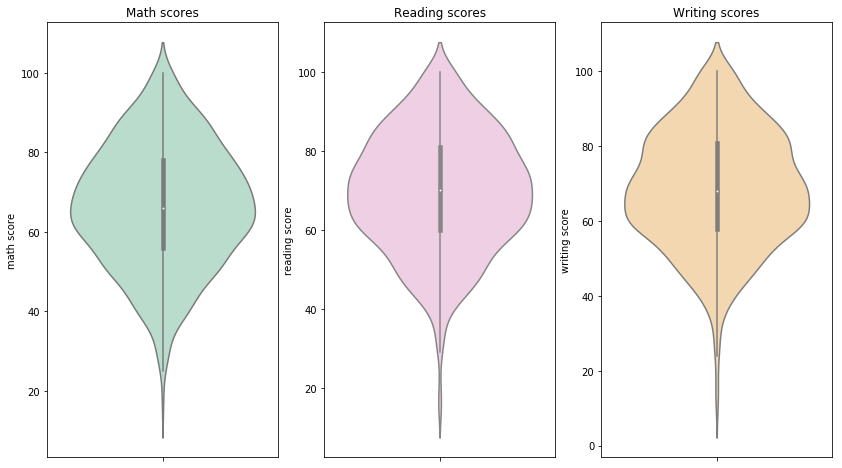

In [11]:
plt.figure(figsize=(24,8))

plt.subplot(1, 5, 1)
plt.title('Math scores')
sns.violinplot(y='math score',data=data,palette='Pastel2')

plt.subplot(1, 5, 2)
plt.title('Reading scores')
sns.violinplot(y='reading score',data=data,palette='Pastel2_r')

plt.subplot(1, 5, 3)
plt.title('Writing scores')
sns.violinplot(y='writing score',data=data,palette='Pastel1_r')
plt.show()

Iz grafa je vidljivo da većina studenata ostvaruje rezultat u rasponu od 40 do 90 bodova za svako od područja. Zatim određujemo korelacijsku matricu za značajke rezultata iz matematike, čitanja i pisanja.

In [12]:
data.corr()

,math score,reading score,writing score
math score,1.000000,0.814729,0.808464
reading score,0.814729,1.000000,0.957270
writing score,0.808464,0.957270,1.000000


Možemo primijetiti visoku korelaciju, koja je iznad 81% za svaku kombinaciju značajki rezultata. Navedeno dodatno potvrđujemo korištenjem sns.pairplot() i sns.heatmap().

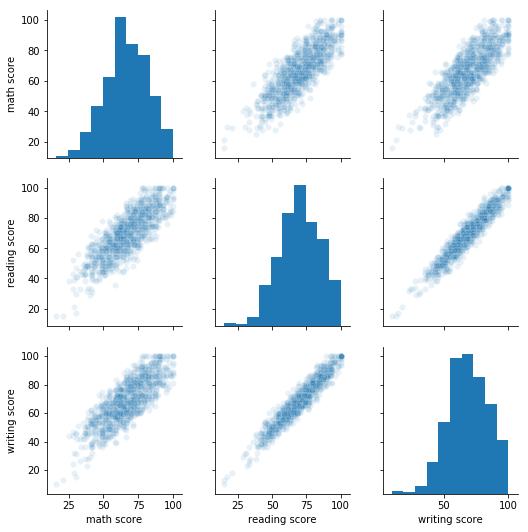

In [13]:
sns.pairplot(data=data, plot_kws={'alpha':0.1})

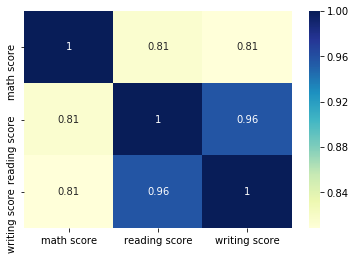

In [14]:
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True)
plt.show()

Prije nastavka analize uvodimo dodatan stupac "total score", koji sadrži ukupan rezultat, odnosno zbroj pojedinačnih rezultata iz matematike, čitanja i pisanja.

In [15]:
data["total score"]=data["math score"]+data["reading score"]+data["writing score"]
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,male,group B,some college,free/reduced,none,54,51,49,154
1,male,group D,high school,standard,none,88,75,76,239
2,male,group C,some high school,free/reduced,none,53,50,42,145
3,female,group B,bachelor's degree,standard,none,43,48,41,132
4,male,group B,master's degree,free/reduced,completed,89,89,86,264


Obzirom da nas interesira utjecaj pojedinih značajki na rezultate, u nastavku vizualiziramo navedeno korištenjem *seaborn* paketa.

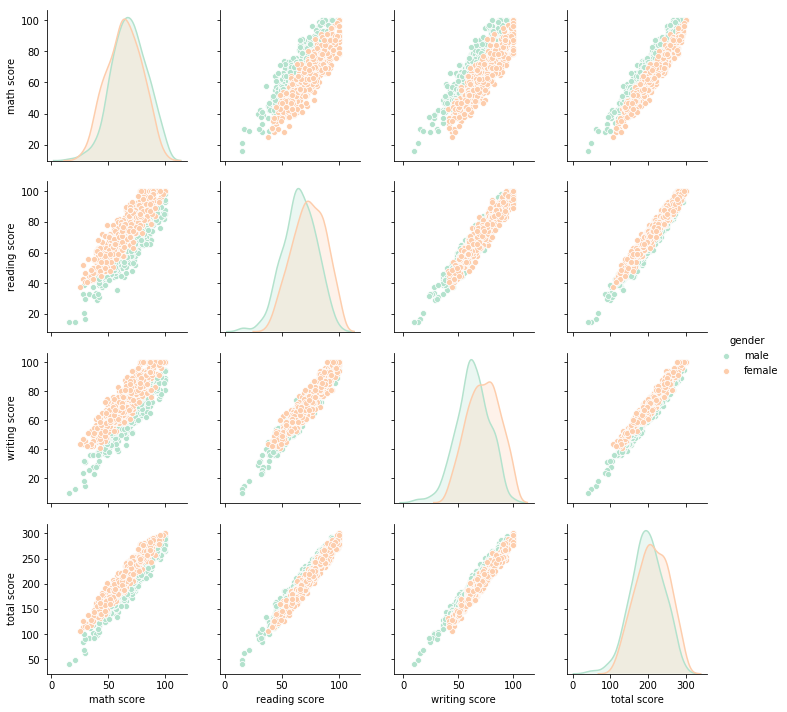

In [16]:
sns.pairplot(data, hue = 'gender', palette="Pastel2")
plt.show()

Iz gornjih je grafova vidljivo da učenice u odnosu na učenike u prosjeku postižu bolje rezultate u čitanju i pisanju, ali slabije iz matematike. U nastavku koristimo barplotove i boxplotove za vizualizaciju veze između raznih značajki i rezultata iz matematike, čitanja i pisanja.

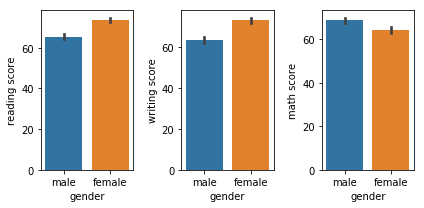

In [17]:
plt.figure(figsize=(6,3))

plt.subplot(1,3,1)
sns.barplot(x='gender', y ='reading score', data = data)

plt.subplot(1,3,2)
sns.barplot(x='gender', y ='writing score', data = data)

plt.subplot(1,3,3)
sns.barplot(x='gender', y ='math score', data = data)

plt.tight_layout()

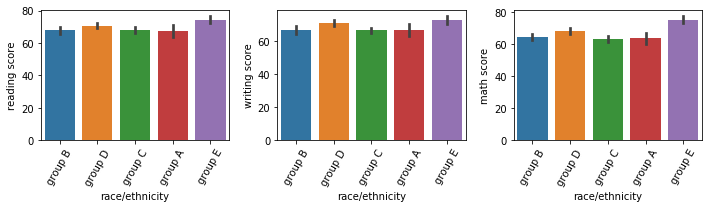

In [18]:
plt.figure(figsize=(10,3))

plt.subplot(1,3,1)
sns.barplot(x='race/ethnicity', y='reading score', data = data)
plt.xticks(rotation = 60)

plt.subplot(1,3,2)
sns.barplot(x='race/ethnicity', y='writing score', data = data)
plt.xticks(rotation = 60)

plt.subplot(1,3,3)
sns.barplot(x='race/ethnicity', y='math score', data = data)
plt.xticks(rotation = 60)

plt.tight_layout()

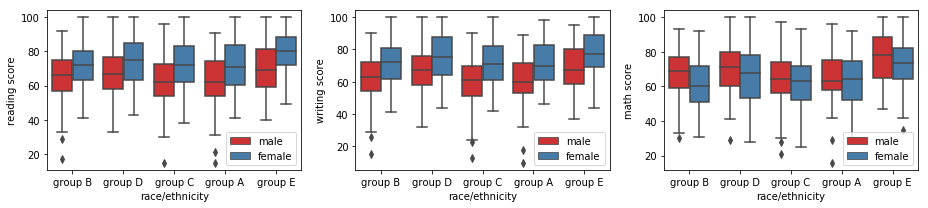

In [19]:
plt.figure(figsize=(13,3))

plt.subplot(1,3,1)
sns.boxplot(x=data['race/ethnicity'], y=data['reading score'], hue=data['gender'], palette="Set1")
plt.legend(loc='lower right')

plt.subplot(1,3,2)
sns.boxplot(x=data['race/ethnicity'], y=data['writing score'], hue=data['gender'], palette="Set1")
plt.legend(loc='lower right')

plt.subplot(1,3,3)
sns.boxplot(x=data['race/ethnicity'], y=data['math score'], hue=data['gender'], palette="Set1")
plt.legend(loc='lower right')

plt.tight_layout()

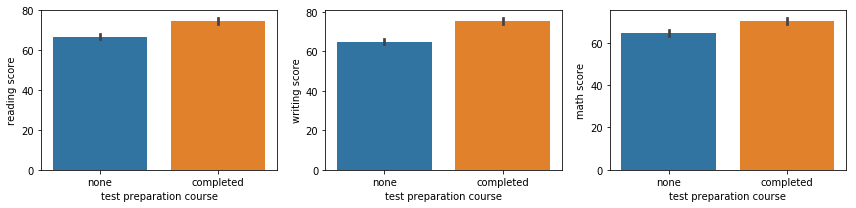

In [20]:
plt.figure(figsize=(12,3))

plt.subplot(1,3,1)
sns.barplot(x ='test preparation course', y ='reading score', data = data)

plt.subplot(1,3,2)
sns.barplot(x ='test preparation course', y ='writing score', data = data)

plt.subplot(1,3,3)
sns.barplot(x ='test preparation course', y ='math score', data = data)

plt.tight_layout()

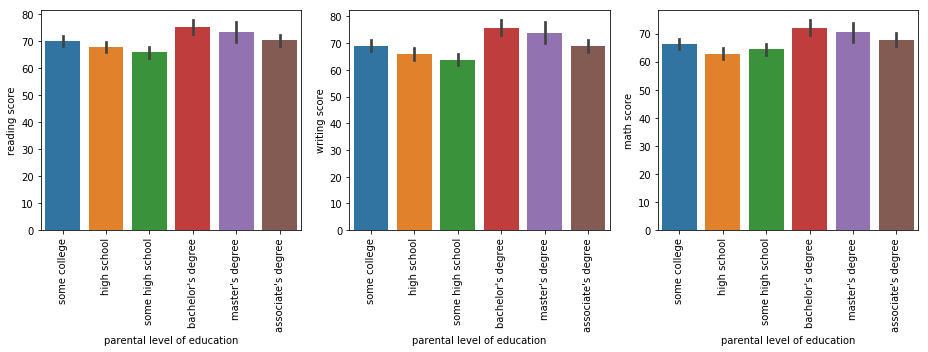

In [21]:
plt.figure(figsize=(13,5))

plt.subplot(1,3,1)
sns.barplot(x='parental level of education', y ='reading score', data = data)
plt.xticks(rotation = 90)

plt.subplot(1,3,2)
sns.barplot(x='parental level of education', y ='writing score', data = data)
plt.xticks(rotation = 90)

plt.subplot(1,3,3)
sns.barplot(x='parental level of education', y ='math score', data = data)
plt.xticks(rotation = 90)

plt.tight_layout()

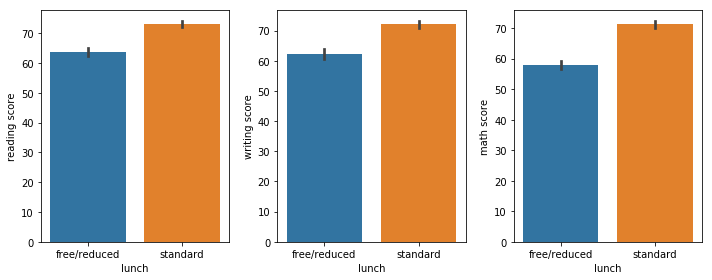

In [22]:
plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
sns.barplot(x='lunch', y='reading score', data=data)

plt.subplot(1,3,2)
sns.barplot(x='lunch', y='writing score', data=data)

plt.subplot(1,3,3)
sns.barplot(x='lunch', y='math score', data=data)

plt.tight_layout()

Iz gornjih je grafova vidljivo sljedeće:
-  učenice u odnosu na učenike u prosjeku postižu bolje rezultate u čitanju i pisanju, ali slabije iz matematike
-  učenici iz etničke skupine E postižu u prosjeku najbolje rezultate, dok učenici iz skupine B postižu najlošije
-  učenici koji idu na pripremni tečaj te učenici koji jedu standardni (nereducirani) ručak postižu bolje rezultate
-  učenici čiji roditelji imaju višu razinu obrazovanja u prosjeku postižu bolje rezultate

Zanimljivo je primujetiti i sljedeću "anomaliju": učenici čiji roditelji imaju završen magisterij postižu ponešto lošije rezultate od učenika čiji roditelji imaju završen samo "bachelor" studij.

U daljnjem dijelu analize određujemo dolaze li rezultati testova iz normalne distribucije. U tu svrhu koristimo Q-Q grafove.

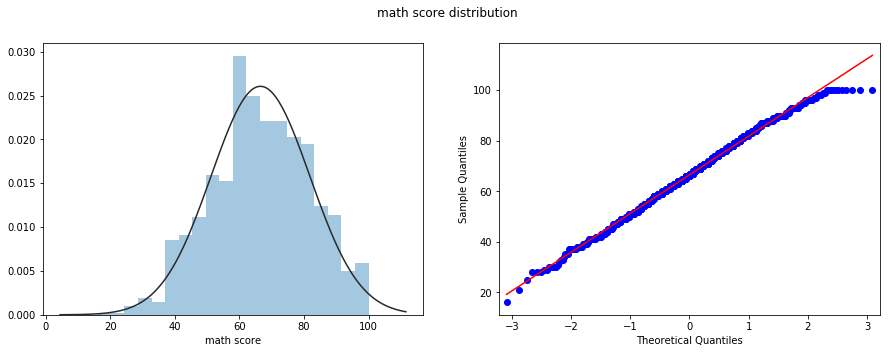

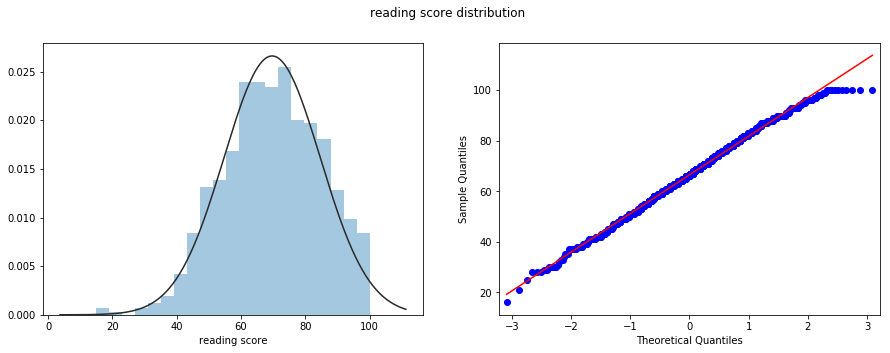

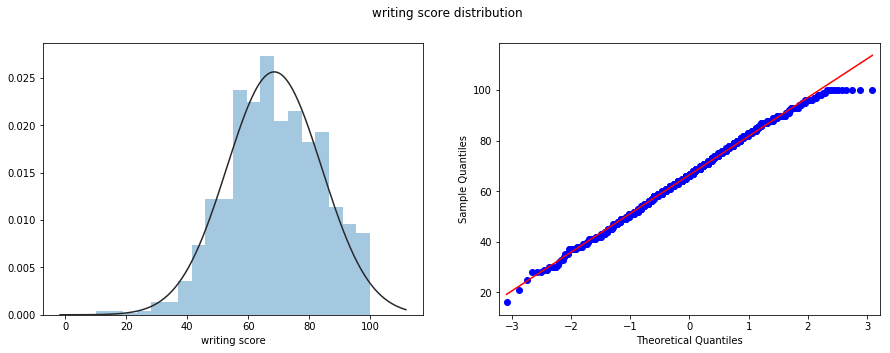

In [23]:
def graphplot(df, column):
    v1, v2 = plt.subplots(1, 2, figsize=(15,5))
    sns.distplot(df[column], fit=norm, kde=False,ax=v2[0])
    qqplot(data['math score'], line='s', ax=v2[1])
    v1.suptitle(column +' distribution')
    plt.show()

graphplot(data,'math score')
graphplot(data,'reading score')
graphplot(data,'writing score')


Na temelju QQ grafova zaključujemo da su rezultati testova iz sva 3 područja distribuirani **aproksimativno normalno uz prisustvo laganih repova**. Međutim, lagani su repovi očekivani s obzirom na to da ne postoji maksimalan (niti minimalan) broj bodova na testovima.
***

## Prediktivna analitika

U nastavku radimo na prediktivnoj analitici - **predviđanju varijable "total score"** na temelju značajki. Korist ćemo strojno učenje, konkretnije metodu *random forests*. Najprije učitavamo sve potrebne pakete i funkcije, a zatim vršimo pretprocesuiranje podataka.

In [24]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [25]:
data1 = data.replace(["male", "female", "standard", "free/reduced", "none", "completed", "some high school","high school","some college", "associate's degree", "bachelor's degree", "master's degree"], [1, 0, 1, 0, 0, 1, 0, 1, 2, 3, 4, 5])
one_hot = pd.get_dummies(data1['race/ethnicity'])
data1 = data1.drop('race/ethnicity', axis = 1)
data1 = data1.join(one_hot)
X = data1.iloc[:,4:7].values
y = data1.iloc[:,3].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [26]:
regressor = RandomForestClassifier(n_estimators = 10, random_state=3)
regressor.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=3, verbose=0, warm_start=False)

In [27]:
regressor.score(X_test, y_test)

0.65

## Clustering učenika

U ovom dijelu analize koristimo k-means algoritam za clustering, koji je dio nenadziranog učenja. Njime možemo identificirati određene grupe učenika sa sličnostima. Najprije pišemo funkciju koja dodjeljuje ocjene učenicima na temelju rezultata.

In [28]:
def ocjene(x):
    if x<45:
        return "nedovoljan"
    if x>=45 and x<60:
        return "dovoljan"
    if x>=60 and x<75:
        return "dobar"
    if x>=75 and x<90:
        return "vrlo dobar"
    if x>=90 and x<=100:
        return "izvrstan"

In [29]:
average_score = data.iloc[:,-4:-1]
x3 =  data.iloc[:,-4:-1]
onehot1=OneHotEncoder()
average_score=onehot1.fit_transform(average_score.applymap(ocjene)).toarray()

In [30]:
# Fitting K-Means to the dataset
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 6, init = 'k-means++')
y_kmeans = kmeans.fit_predict(average_score)
x3["cluster"] = y_kmeans

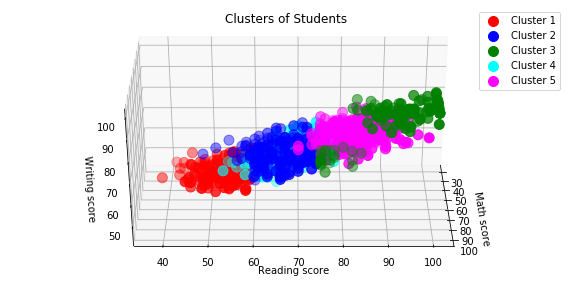

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [31]:
# Visualising the clusters
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure(figsize = (10, 5))
ax11 = fig.add_subplot(111, projection='3d')
ax11.scatter((x3[x3.cluster == 0])["math score"].values, (x3[x3.cluster == 0])["reading score"].values, (x3[x3.cluster == 0])["writing score"].values, s = 100, c = 'red', label = 'Cluster 1')
ax11.scatter((x3[x3.cluster == 1])["math score"].values, (x3[x3.cluster == 1])["reading score"].values, (x3[x3.cluster == 1])["writing score"].values, s = 100, c = 'blue', label = 'Cluster 2')
ax11.scatter((x3[x3.cluster == 2])["math score"].values, (x3[x3.cluster == 2])["reading score"].values, (x3[x3.cluster == 2])["writing score"].values, s = 100, c = 'green', label = 'Cluster 3')
ax11.scatter((x3[x3.cluster == 3])["math score"].values, (x3[x3.cluster == 3])["reading score"].values, (x3[x3.cluster == 3])["writing score"].values, s = 100, c = 'cyan', label = 'Cluster 4')
ax11.scatter((x3[x3.cluster == 4])["math score"].values, (x3[x3.cluster == 4])["reading score"].values, (x3[x3.cluster == 4])["writing score"].values, s = 100, c = 'magenta', label = 'Cluster 5')
ax11.set_title('Clusters of Students')
ax11.set_xlabel('Math score')
ax11.set_ylabel('Reading score')
ax11.set_zlabel('Writing score')
ax11.legend()

for angle in range(0, 360):
    ax11.view_init(30, angle)
    plt.draw()
    plt.pause(.001)